# Iman Noor
---

# **Evaluation Techniques for Regression Models**

Evaluating the performance of regression models is crucial to understand how well the model is performing and to compare different models.

# **Requirement of Evaluation Metrics**

- Machine learning model cannot have 100 per cent efficiency otherwise the model is known as a biased model. which further includes the concept of overfitting and underfitting.
- It is necessary to obtain the accuracy on training data, But it is also important to get a genuine and approximate result on unseen data otherwise Model is of no use.
- So to build and deploy a generalized model we require to Evaluate the model on different metrics which helps us to better optimize the performance, fine-tune it, and obtain a better result.

## **Generating data**

In [1]:
data = {
    'Feature1': [2.3, 4.1, 5.6, 3.3, 7.4, 8.5, 9.1, 6.8, 5.2, 4.7, 3.8, 7.9, 6.4, 5.9, 7.0, 3.2, 8.0, 9.2, 4.6, 6.5],
    'Feature2': [15.2, 18.7, 19.4, 17.8, 16.5, 20.9, 21.1, 18.6, 17.2, 16.4, 14.8, 21.0, 20.2, 19.3, 18.0, 15.4, 20.0, 22.1, 16.9, 19.6],
    'Feature3': [30.5, 31.7, 35.4, 33.2, 34.1, 36.0, 37.2, 34.8, 33.5, 32.4, 30.9, 35.7, 36.1, 34.0, 33.7, 31.6, 36.8, 37.9, 32.8, 34.4],
    'Target': [50.2, 54.3, 58.4, 52.1, 56.5, 60.3, 62.1, 58.0, 55.7, 53.4, 51.2, 59.1, 60.0, 57.2, 55.0, 52.0, 61.0, 63.5, 54.6, 57.8]
}

## **Creating DataFrame**

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame(data)
df.head()

,Feature1,Feature2,Feature3,Target
0,2.3,15.2,30.5,50.2
1,4.1,18.7,31.7,54.3
2,5.6,19.4,35.4,58.4
3,3.3,17.8,33.2,52.1
4,7.4,16.5,34.1,56.5


## **Splitting the data**

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df[['Feature1', 'Feature2', 'Feature3']]
y = df['Target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## **Fit a Simple Regression Model**

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## **Make Predictions**

In [9]:
y_pred = model.predict(X_test)
y_pred

array([53.90793045, 52.3237186 , 57.08652048, 55.13897493])

## **1. Mean Absolute Error (MAE):**
- Measures the average magnitude of errors in a set of predictions, without considering their direction.
- Sum all the errors and divide them by a total number of observations And this is MAE. And we aim to get a minimum MAE because this is a loss.

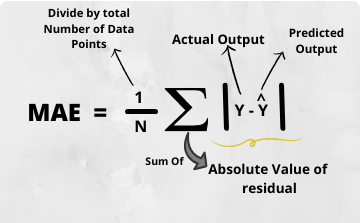


In [10]:
mae_direct = np.mean(np.abs(y_test - y_pred))
print('Mean Absolute Error:', mae_direct)

Mean Absolute Error: 0.9857138849208358


In [11]:
from sklearn.metrics import mean_absolute_error

In [12]:
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ', mae)

Mean Absolute Error:  0.9857138849208358


### **Advantages of MAE**
- The MAE you get is in the same unit as the output variable.
- It is most Robust to outliers.

### **Disadvantages of MAE**
- The graph of MAE is not differentiable so we have to apply various optimizers like Gradient descent which can be differentiable.


## **2. Mean Squared Error (MSE):**
- Measures the average of the squares of the errors, emphasizing larger errors more due to squaring.
- It represents the squared distance between actual and predicted values.

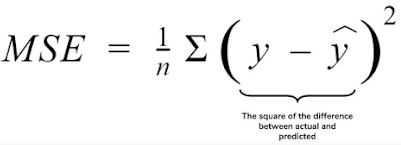

In [13]:
mse_direct = np.mean((y_test - y_pred) ** 2)
print('Mean Square Error:', mse_direct)

Mean Square Error: 1.3021126455820178


In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Square Error: ', mse)

Mean Square Error:  1.3021126455820178


## **3. Root Mean Squared Error (RMSE):**
- Square root of the MSE, provides error estimates in the same unit as the target variable.
- It is a simple square root of mean squared error.
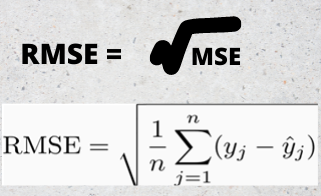

In [16]:
rmse_direct = np.sqrt(np.mean((y_test - y_pred) ** 2))
print('Root Mean Squared Error:', rmse_direct)

Root Mean Squared Error: 1.1411015053806641


In [17]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ', rmse)

Root Mean Squared Error:  1.1411015053806641


## **4. R-squared (R²):**
- Indicates the proportion of variance in the dependent variable that is predictable from the independent variables.

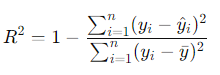

- A value between 0 and 1, where closer to 1 indicates a better fit.

In [18]:
ss_res = np.sum((y_test - y_pred) ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared_direct = 1 - (ss_res / ss_tot)
print('R-squared:', r_squared_direct)

R-squared: 0.30922406069919406


In [19]:
from sklearn.metrics import r2_score

In [20]:
r2 = r2_score(y_test,y_pred)
print('R-squared:', r2)

R-squared: 0.30922406069919406


## **5. Adjusted R-squared:**
- Adjusts the R-squared value for the number of predictors in the model, providing a more accurate measure when multiple predictors are involved.
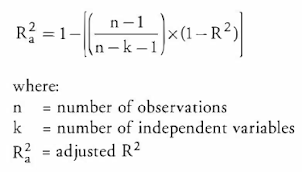


In [21]:
def adjusted_r2_score(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    p = X.shape[1]
    adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
    return adj_r2

In [22]:
adj_r2 = adjusted_r2_score(y_test, y_pred, X_test)
print('Adjusted R2 Score:', adj_r2)

Adjusted R2 Score: -inf


<ipython-input-21-f56b63471cd6>:5: RuntimeWarning: divide by zero encountered in scalar divide
  adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)


In [23]:
n=40
k=2
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print('Adjusted R2 Score:', adj_r2_score)

Adjusted R2 Score: 0.2718848207369884


## **6. Root Mean Squared Log Error(RMSLE):**
- The Root Mean Squared Logarithmic Error (RMSLE) is a metric used to evaluate the performance of regression models.

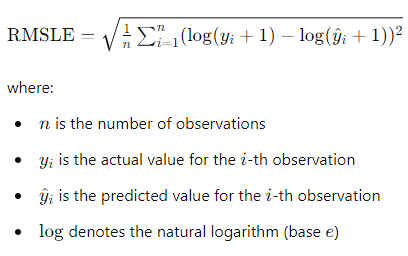


In [24]:
rmsle = np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
print('Root Mean Squared Log Error:', rmsle)

Root Mean Squared Log Error: 0.13199402869403384


## **7. Mean Absolute Percentage Error (MAPE):**
- Measures the accuracy of predictions as a percentage.

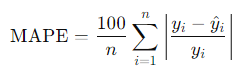

In [25]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [26]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE:', mape)

MAPE: 1.78717680187827


## **8. Median Absolute Error:**
- Provides a robust measure of the central tendency of the absolute errors, less influenced by outliers.
- **Formula:** Median of the absolute differences between the actual and predicted values.

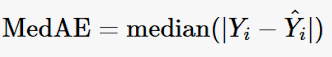

- **Usage:** Useful when the data contains outliers.

In [27]:
from sklearn.metrics import median_absolute_error

In [28]:
med_ae = median_absolute_error(y_test, y_pred)
print('Median Absolute Error: ', med_ae)

Median Absolute Error:  0.7027745386407247


In [29]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, BayesianRidge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
}

predictions = {}
metrics = {}

# Fit models, make predictions, and calculate metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mee = median_absolute_error(y_test, y_pred)
    metrics[name] = [mae, rmse, mee]

def plot_error_metrics(model_name: str, 
                       x_true: np.array, 
                       y_true: np.array, 
                       y_pred: np.array, 
                       mae: float, 
                       rmse: float, 
                       mee: float) -> None:
    """
    Function to plot data, model predictions, and error metrics for a specific model
    
    Inputs:
        model_name -> string, name of the model
        x_true -> array containing sample indices or some predictor variable
        y_true -> array containing actual dependent variable
        y_pred -> array containing model predictions
        mae -> mean absolute error
        rmse -> root mean squared error
        mee -> median absolute error
    """
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18, 6))

    ax0.set_title(f'{model_name} - Mean Absolute Error', weight='bold', fontsize=16)
    ax0.scatter(x_true, y_true, label='True Values', color='blue')
    ax0.errorbar(x_true, y_pred, yerr=mae, fmt='o', color='orange', label=f'Predictions with MAE = {mae:.2f}')
    ax0.set_xlabel('Sample Index', weight='bold')
    ax0.set_ylabel('Target', weight='bold')
    ax0.legend()

    ax1.set_title(f'{model_name} - Root Mean Squared Error', weight='bold', fontsize=16)
    ax1.scatter(x_true, y_true, label='True Values', color='blue')
    ax1.errorbar(x_true, y_pred, yerr=rmse, fmt='o', color='orange', label=f'Predictions with RMSE = {rmse:.2f}')
    ax1.set_xlabel('Sample Index', weight='bold')
    ax1.legend()

    ax2.set_title(f'{model_name} - Median Absolute Error', weight='bold', fontsize=16)
    ax2.scatter(x_true, y_true, label='True Values', color='blue')
    ax2.errorbar(x_true, y_pred, yerr=mee, fmt='o', color='orange', label=f'Predictions with MEE = {mee:.2f}')
    ax2.set_xlabel('Sample Index', weight='bold')
    ax2.legend()

    fig.suptitle(f'{model_name} - Data & Predictions with Various Error Measures', weight='bold', fontsize=16)
    plt.tight_layout()
    plt.show()

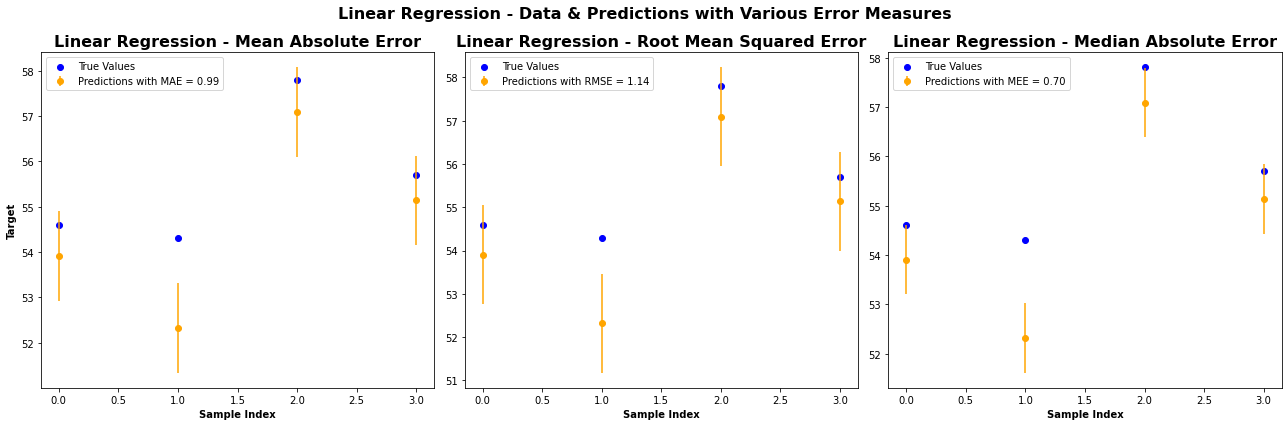

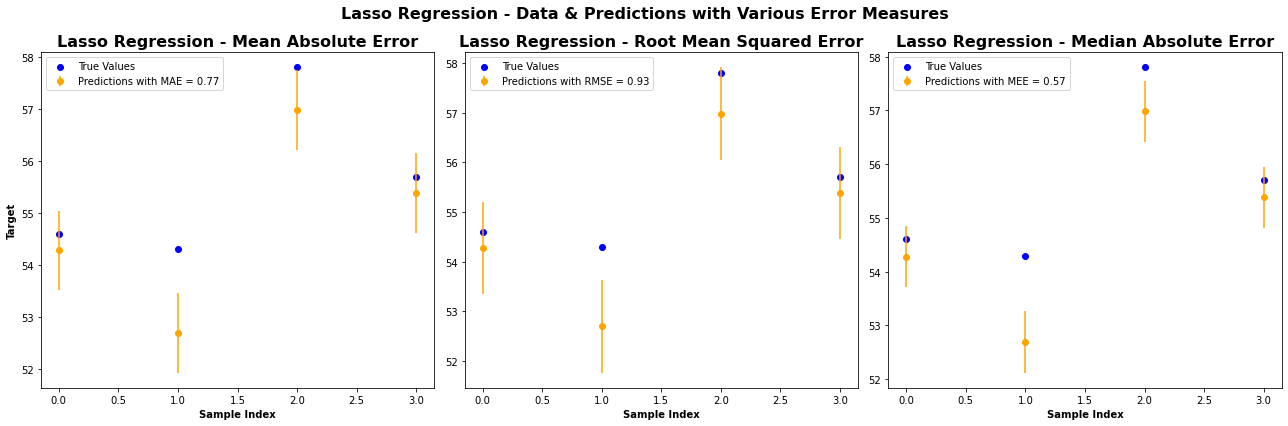

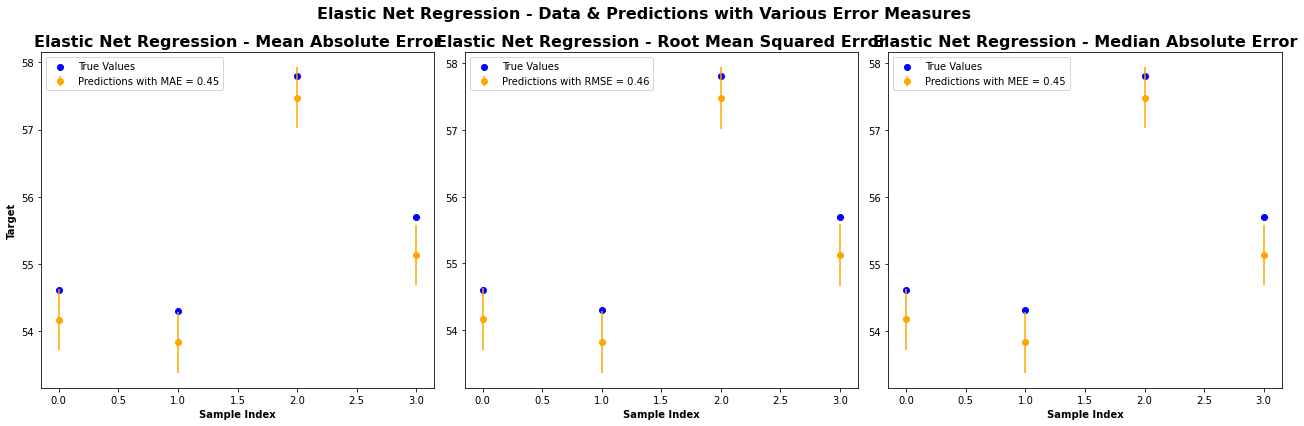

In [30]:
for name, y_pred in predictions.items():
    mae, rmse, mee = metrics[name]
    plot_error_metrics(name, np.arange(len(y_test)), y_test, y_pred, mae, rmse, mee)

# **The End :)**